### Examining Transaction Data

In [1]:
import pandas as pd

# loading transaction dataset as Excel
transactions = pd.read_excel(r"D:\projects\RetailTrialImpactAnalysis\1st_Sprint\transaction_data.xlsx", sheet_name="in")
transactions.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
238035,2018-08-20,112,112153,114687,94,Burger Rings 220g,1,2.3
67787,2018-11-18,232,232095,235743,43,Smith Crinkle Cut Bolognese 150g,2,5.2
35918,2019-04-01,43,43175,39807,7,Smiths Crinkle Original 330g,2,11.4
118927,2018-10-22,15,15104,13384,114,Kettle Sensations Siracha Lime 150g,2,9.2
238188,2018-08-18,167,167488,169310,32,Kettle Sea Salt And Vinegar 175g,1,5.4
60591,2019-03-20,100,100143,99324,58,Red Rock Deli Chikn&Garlic Aioli 150g,2,5.4
4826,2018-09-29,259,259085,257960,22,Thins Chips Originl saltd 175g,2,6.6
47569,2018-10-12,172,172202,174001,11,RRD Pc Sea Salt 165g,2,6.0
239212,2018-09-20,8,8269,8179,75,Cobs Popd Sea Salt Chips 110g,2,7.6
219556,2019-02-20,60,60284,57371,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [2]:
# define function for examining the data frame to avoid redundancy 
def analyze_df(df, show_nulls=True, show_duplicates=True, show_dtypes=True):
    
    if not isinstance(df, pd.DataFrame):
        print("invalid: the input must be a pandas DataFrame.")
        return False
    
    result = {}
    
    if show_nulls:
        nulls = df.isnull().sum()
        result['Null Counts'] = {
            'Total Nulls': nulls.sum(),
            'Nulls by Column': nulls
        }
    
    if show_duplicates:
        result['Duplicates'] = {
            'Total Duplicate Rows': df.duplicated().sum(),
            'Total Duplicate Columns': df.T.duplicated().sum()
        }
    
    if show_dtypes:
        result['Data Types'] = df.dtypes
    
    # print the result
    print(f"Analysis for DataFrame ({len(df)} rows, {len(df.columns)} columns)")
    print("=" * 60)
    
    for section, data in result.items():
        print(f"\n{section}:")
        print("-" * 40)
        if isinstance(data, dict):
            for k, v in data.items():
                print(f"{k}:")
                print(v.to_string() if hasattr(v, 'to_string') else v)
        else:
            print(data.to_string())
    
    return
    

In [3]:
# renaming columns
transactions.columns = [
    'Date', 'StoreNumber', 'LoyalityCardNumber', 'TransactionID', 
    'ProductNumber', 'ProductName', 'ProductQuantity', 'TotalSales'
]

# examining data types and check for missing values
analyze_df(transactions, show_duplicates=False)

Analysis for DataFrame (264836 rows, 8 columns)

Null Counts:
----------------------------------------
Total Nulls:
0
Nulls by Column:
Date                  0
StoreNumber           0
LoyalityCardNumber    0
TransactionID         0
ProductNumber         0
ProductName           0
ProductQuantity       0
TotalSales            0

Data Types:
----------------------------------------
Date                  datetime64[ns]
StoreNumber                    int64
LoyalityCardNumber             int64
TransactionID                  int64
ProductNumber                  int64
ProductName                   object
ProductQuantity                int64
TotalSales                   float64


In [4]:
# examine quantity and sales to ensure integrity
transactions[['ProductQuantity', 'TotalSales']].describe()

,ProductQuantity,TotalSales
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


In [ ]:
# implement a function to measure Coefficient of Variation(CV) to check extreme variability.
def cv(col):
    col_cv = col.std() / col.mean() * 100
    result = ''
    if col_cv < 30:
        result = f"Low variability for '{col.name}' column, Data points are tightly clustered."
    elif col_cv > 30 and col_cv < 100:
        result = f"Moderate variability for '{col.name}' column, but data still within expected range."
    else:
        result = f"Extreme variability for '{col.name}' column. Check for potential outliers or errors"
    return result

print(cv(transactions['ProductQuantity']), '\n')
print(cv(transactions['TotalSales']))

Moderate variability for 'ProductQuantity' column, but data still within expected range. 

Moderate variability for 'TotalSales' column, but data still within expected range.


In [7]:
# check for dublicates
print("\nNumber of duplicated rows:")
print(transactions.duplicated().sum())



Number of duplicated rows:
1


In [8]:
# drop the duplicated row
transactions.drop_duplicates(inplace=True)

### Examine Customer Data

In [10]:
# load purchace data as CSV
purchaseBehaviour = pd.read_csv(r"D:\projects\RetailTrialImpactAnalysis\1st_Sprint\purchase_behaviour.csv")
purchaseBehaviour.sample(10)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
47373,176442,OLDER SINGLES/COUPLES,Budget
13141,48234,RETIREES,Premium
29300,107222,MIDAGE SINGLES/COUPLES,Premium
27437,100191,YOUNG SINGLES/COUPLES,Premium
52558,197334,NEW FAMILIES,Budget
40146,150244,OLDER FAMILIES,Budget
27634,101146,YOUNG SINGLES/COUPLES,Budget
1177,4155,NEW FAMILIES,Mainstream
37807,141314,OLDER FAMILIES,Budget
62516,235189,YOUNG FAMILIES,Mainstream


In [11]:
# ranaming columns 
purchaseBehaviour.columns = [
    'LoyalityCardNumber', 'LifeStage', 'PremiumCustomer'
]

# examining data types and check for missing values
analyze_df(purchaseBehaviour, show_duplicates=False)

Analysis for DataFrame (72637 rows, 3 columns)

Null Counts:
----------------------------------------
Total Nulls:
0
Nulls by Column:
LoyalityCardNumber    0
LifeStage             0
PremiumCustomer       0

Data Types:
----------------------------------------
LoyalityCardNumber     int64
LifeStage             object
PremiumCustomer       object


In [12]:
# check for dublicates
print("\nNumber of duplicated rows:")
print(purchaseBehaviour.duplicated().sum())



Number of duplicated rows:
0


In [13]:
# checking unique values for categorical columns
print('LifeStage column unique values:\n', purchaseBehaviour['LifeStage'].unique(), '\n')
print('PremiumCustomer column unique values:\n', purchaseBehaviour['PremiumCustomer'].unique())

LifeStage column unique values:
 ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

PremiumCustomer column unique values:
 ['Premium' 'Mainstream' 'Budget']


In [14]:
# splitting 'LifeStage' into 'AgeGroup' (or keeping 'LifeStage' for the age part) and 'SocialStatus' 
# to allow easy analyze trends purely based on the age group and martial status
split_data = purchaseBehaviour['LifeStage'].str.split(' ', expand=True, n=1)
purchaseBehaviour['AgeGroup'] = split_data[0]
purchaseBehaviour['SocialStatus'] = split_data[1]
purchaseBehaviour.drop(columns=['LifeStage'], inplace=True)

# ensure data splitted as intended
purchaseBehaviour.head()

,LoyalityCardNumber,PremiumCustomer,AgeGroup,SocialStatus
0,1000,Premium,YOUNG,SINGLES/COUPLES
1,1002,Mainstream,YOUNG,SINGLES/COUPLES
2,1003,Budget,YOUNG,FAMILIES
3,1004,Mainstream,OLDER,SINGLES/COUPLES
4,1005,Mainstream,MIDAGE,SINGLES/COUPLES


### Merging Transaction & Customer Data

In [15]:
# identify Common columns for merging
print("Transaction Columns:", transactions.columns)
print("Customer Columns:", purchaseBehaviour.columns)

Transaction Columns: Index(['Date', 'StoreNumber', 'LoyalityCardNumber', 'TransactionID',
       'ProductNumber', 'ProductName', 'ProductQuantity', 'TotalSales'],
      dtype='object')
Customer Columns: Index(['LoyalityCardNumber', 'PremiumCustomer', 'AgeGroup', 'SocialStatus'], dtype='object')


In [16]:
# merge using 'LoyalityCardNumber' column
# I will use 'inner' to keep only matching records
full_df = pd.merge(left=transactions, right=purchaseBehaviour, on='LoyalityCardNumber', how='inner')

In [17]:
# verify the merge step
print(full_df.info())
print(full_df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                264835 non-null  datetime64[ns]
 1   StoreNumber         264835 non-null  int64         
 2   LoyalityCardNumber  264835 non-null  int64         
 3   TransactionID       264835 non-null  int64         
 4   ProductNumber       264835 non-null  int64         
 5   ProductName         264835 non-null  object        
 6   ProductQuantity     264835 non-null  int64         
 7   TotalSales          264835 non-null  float64       
 8   PremiumCustomer     264835 non-null  object        
 9   AgeGroup            264835 non-null  object        
 10  SocialStatus        215072 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.2+ MB
None
             Date  StoreNumber  LoyalityCardNumber  Transacti

#### Note on SocialStatus Nulls
Null values in the *SocialStatus* column are a consequence of the splitting operation. This occurs for original *LifeStage* value (*RETIREES*) that comprise a single word, leaving no second component to accomodate the *SocialStatus* field.

In [18]:
# inspecting the nulls
full_df[full_df['SocialStatus'].isnull()][['AgeGroup', 'SocialStatus']].sample(5)

# fill the nulls with 'No-status'
full_df['SocialStatus'].fillna('No_STATUS', inplace=True)

# check null counts again
full_df.isnull().sum()

Date                  0
StoreNumber           0
LoyalityCardNumber    0
TransactionID         0
ProductNumber         0
ProductName           0
ProductQuantity       0
TotalSales            0
PremiumCustomer       0
AgeGroup              0
SocialStatus          0
dtype: int64

### Analysis & Customer Segments

In [19]:
full_df.head()

,Date,StoreNumber,LoyalityCardNumber,TransactionID,ProductNumber,ProductName,ProductQuantity,TotalSales,PremiumCustomer,AgeGroup,SocialStatus
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Premium,YOUNG,SINGLES/COUPLES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Budget,MIDAGE,SINGLES/COUPLES
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,Budget,MIDAGE,SINGLES/COUPLES
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,Budget,MIDAGE,SINGLES/COUPLES
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Budget,MIDAGE,SINGLES/COUPLES


In [ ]:
# define Key Metrics
totalSales = full_df['TotalSales'].sum()
totalCustomers = full_df['LoyalityCardNumber'].nunique()
transactionsPerCustomer = full_df.groupby('LoyalityCardNumber')['TransactionID'].count().mean()

print(f"Total Sales: ${totalSales:,.2f}")
print(f"Total Unique Customers: {totalCustomers}")
print(f"Avg Transactions per Customer: {transactionsPerCustomer:.2f}")

Total Sales: $1,934,409.00
Total Unique Customers: 72637
Avg Transactions per Customer: 3.65


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\mokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


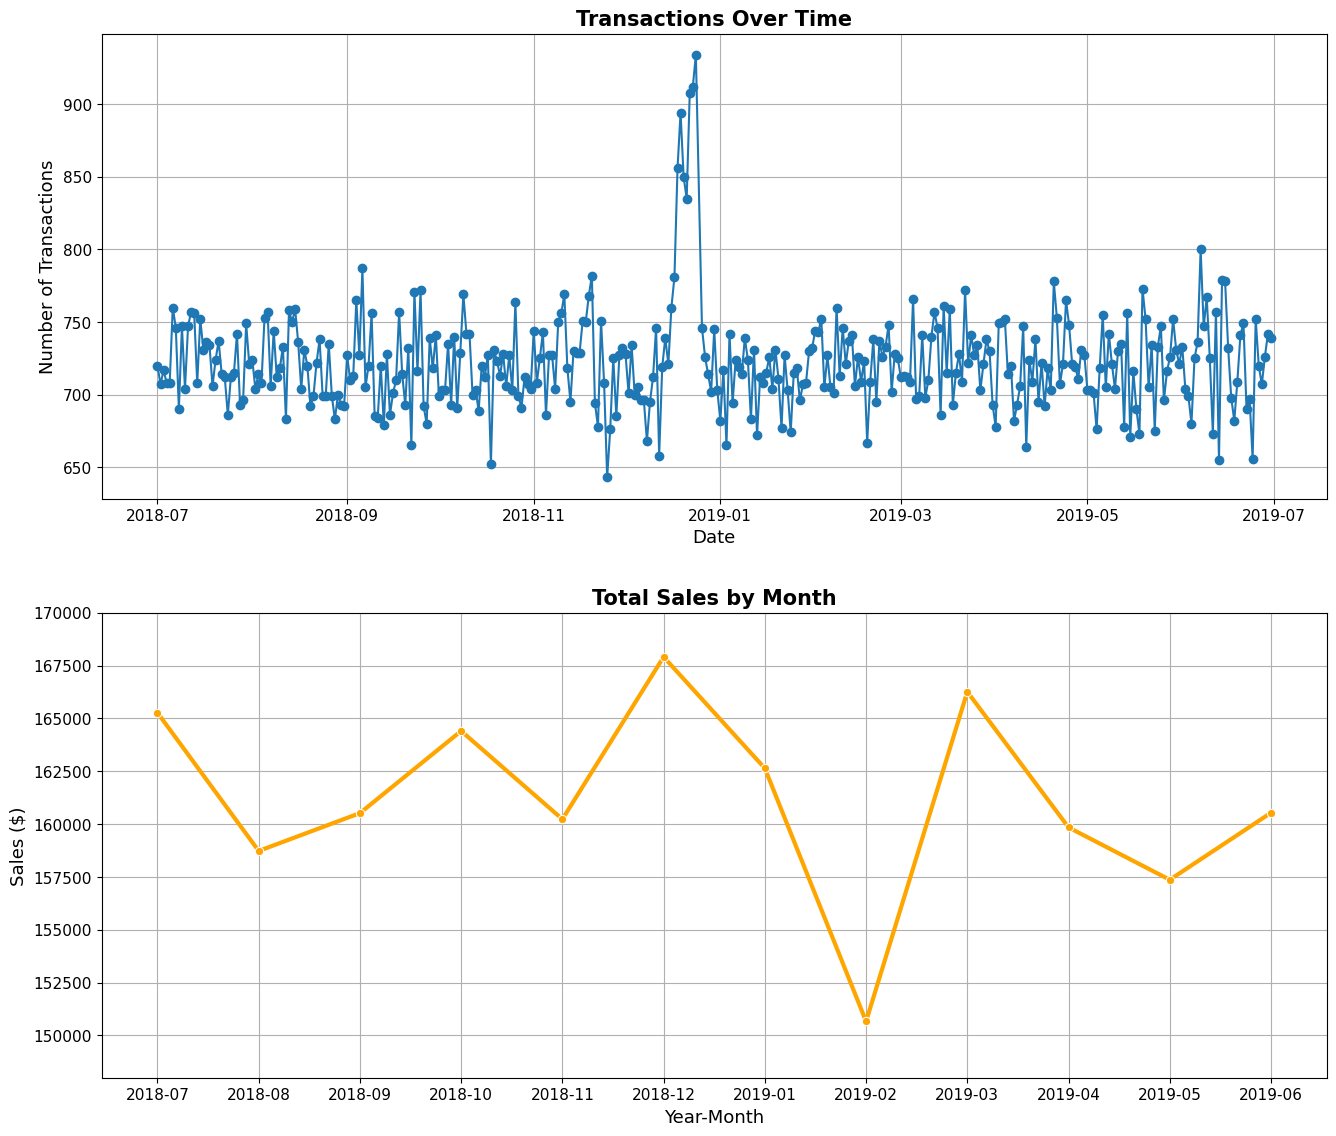

In [87]:
# analyze Sales Drivers (Time of Year)
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# plotting Transactions Over Time
transactions_over_time = full_df.groupby('Date')['TransactionID'].nunique()
axes[0].plot(transactions_over_time.index, transactions_over_time.values, marker='o')
axes[0].set_title('Transactions Over Time', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=13)
axes[0].set_ylabel('Number of Transactions', fontsize=13)
axes[0].tick_params(axis='both', labelsize=11)
axes[0].grid(True)

# plotting Total Sales by Month
monthlySales = (
    full_df.groupby(full_df['Date'].dt.to_period('M').astype(str).rename('yearMonth'))
    ['TotalSales'].sum().reset_index()
    )
sns.lineplot(data=monthlySales, x='yearMonth', y='TotalSales', color='orange', marker='o', ax=axes[1], linewidth=3)
axes[1].set_title("Total Sales by Month", fontsize=15, fontweight='bold')
axes[1].set_xlabel('Year-Month', fontsize=13)
axes[1].set_ylabel('Sales ($)', fontsize=13)
axes[1].set_ylim([148000, 170000])
axes[1].tick_params(axis='both', labelsize=11)
axes[1].grid(True)

plt.tight_layout(pad=3)
plt.show()

**Transactions Over Time:**
- The number of transactions generally fluctuated between 650 and 775 from July 2018 to mid-December 2018 and from January 2019 to July 2019.
- There is a noticeable increase around late December 2018, which may be due to preparations for the New Year., with transaction numbers exceeding 900.


**Total Sales by Month:**
- Monthly sales typically ranged from $150,000 to $170,000.
- Peak sales months were November 2018 (around $167,500) and March 2019 (around $166,00).
- The lowest sales month was February 2019, dropping to just over $150,000.


**Relationship between Charts:**
- The spike in transaction count in late December 2018 did not align with the absolute highest sales month, which occurred in November 2018. This suggests that the high transaction volume during the spike period might have involved cheaper transactions on average compared to other periods.

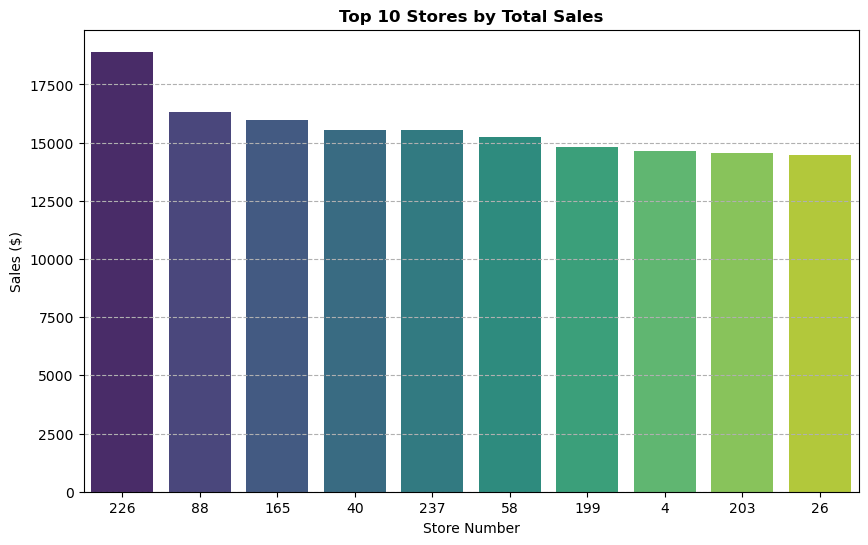

In [103]:
# analyze Sales Drivers (Store Number)
salesByStore = full_df.groupby('StoreNumber')['TotalSales'].sum().sort_values(ascending=False).reset_index()
top10Stores = salesByStore.head(10)
storesOrdered = top10Stores['StoreNumber'].tolist()
plt.figure(figsize=(10,6))
sns.barplot(data=top10Stores, x='StoreNumber', y='TotalSales', order=storesOrdered, palette='viridis')
plt.title('Top 10 Stores by Total Sales', fontweight='bold')
plt.xlabel('Store Number')
plt.ylabel('Sales ($)')
plt.grid(True, axis='y', linestyle='--')
plt.show()

**Leading Performer:** Store 226 stands out as the highest performing store, achieving total sales exceeding $18,000, which is a significantly larger amount than the second highest store. 

**Top Tier:** The top six stores (226, 88, 165, 40, 237, 58) achieved sales exceeding $15,000. 

Consistent performance within the top 10 stores: The sales figures of the top 10 stores range from about $14,500 to just over $18,000.